## Label image refinement
Similar to morphological operations on binary imagges, it is also possible to refine label images. This notebook shows how to do this.

See also
* [scikit-image's Expand segmentation labels without overlap tutorial](https://scikit-image.org/docs/dev/auto_examples/segmentation/plot_expand_labels.html)

In [1]:
import pyclesperanto_prototype as cle
import numpy as np
from skimage.io import imread

cl.OCLArray([[ 0,  0,  0, ..., 13, 13, 13],
       [ 0,  0,  0, ..., 13, 13, 13],
       [ 0,  0,  0, ..., 13, 13, 13],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint32)
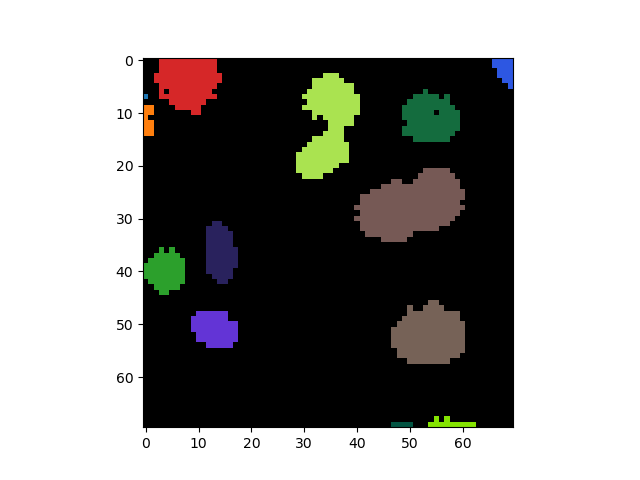

In [2]:
label_image = cle.gauss_otsu_labeling(imread("../../data/mitosis_mod.tif"), outline_sigma=0)
label_image

## Eroding labels
When eroding labels, we need to be careful that objects might split into two. This could be intentional, e.g. to differentiate touching nuclei like in the example above.

cl.OCLArray([[0, 0, 0, ..., 0, 9, 9],
       [0, 0, 0, ..., 0, 9, 9],
       [0, 0, 0, ..., 0, 0, 9],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
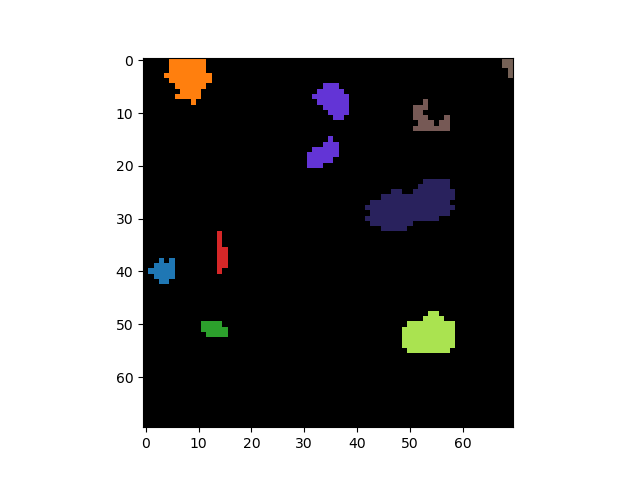

In [3]:
eroded_label_image = cle.erode_labels(label_image,
                                      radius=2,
                                      relabel_islands=False)
eroded_label_image

cl.OCLArray([[ 0,  0,  0, ...,  0, 10, 10],
       [ 0,  0,  0, ...,  0, 10, 10],
       [ 0,  0,  0, ...,  0,  0, 10],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint32)
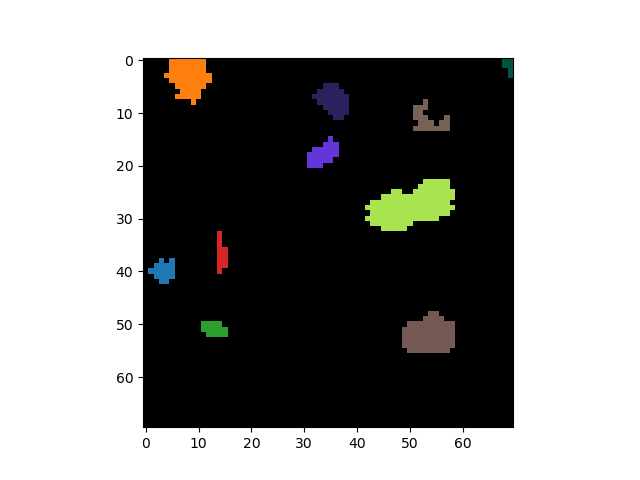

In [4]:
eroded_label_image2 = cle.erode_labels(label_image,
                                      radius=2,
                                      relabel_islands=True)
eroded_label_image2

## Dilating labels
We can then dilate the labels again to come back to their original size approximately. This might also be useful in case segmented objects are too small in general.

cl.OCLArray([[ 0,  0,  0, ..., 10, 10, 10],
       [ 0,  0,  0, ..., 10, 10, 10],
       [ 0,  0,  2, ..., 10, 10, 10],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint32)
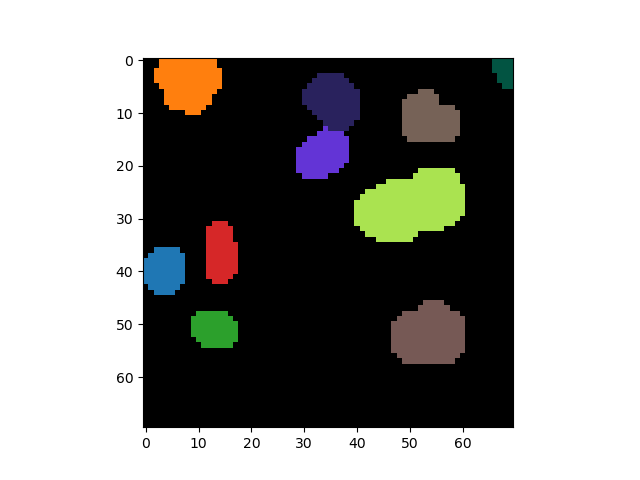

In [5]:
dilated_label_image = cle.dilate_labels(eroded_label_image2, 
                                        radius=2)
dilated_label_image

## Opening and closing labels
Opening and closing for label images is similar like for binary images. The only difference is that when labels touch, they cannot expand anymore.

Note that opening labels may make small labels disappear.

cl.OCLArray([[0, 0, 0, ..., 9, 9, 9],
       [0, 0, 0, ..., 9, 9, 9],
       [0, 0, 2, ..., 9, 9, 9],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
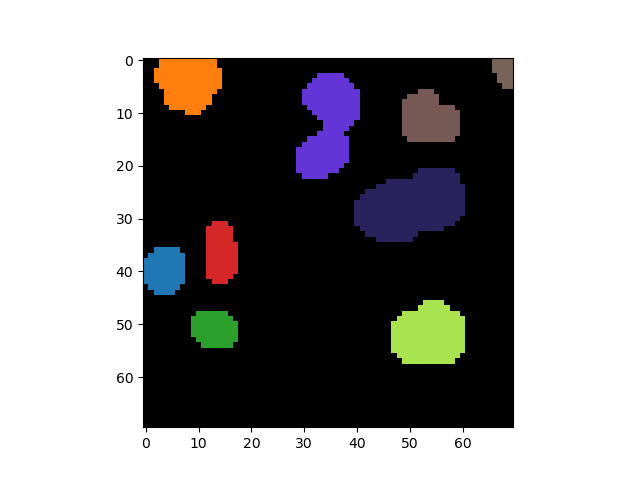

In [6]:
opened_label_image = cle.opening_labels(label_image,
                                        radius=2)
opened_label_image

cl.OCLArray([[ 0,  0,  0, ..., 13, 13, 13],
       [ 0,  0,  0, ..., 13, 13, 13],
       [ 0,  0,  0, ..., 13, 13, 13],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint32)
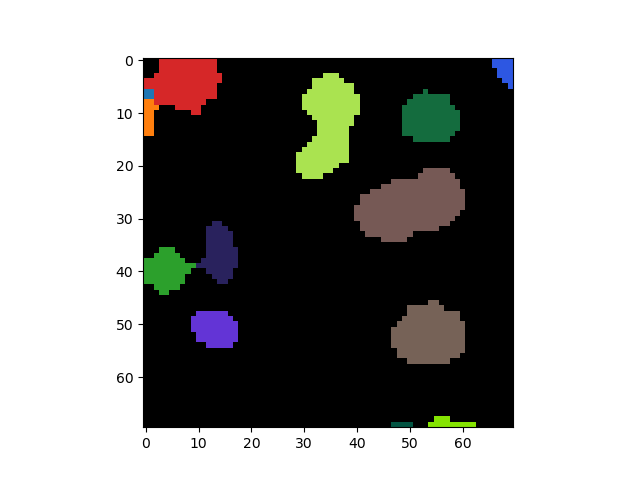

In [7]:
closed_label_image = cle.closing_labels(label_image,
                                        radius=2)
closed_label_image

## Exercise
Use the operations introduced above to make small objects disappear in this label image.

cl.OCLArray([[0, 0, 0, ..., 5, 5, 5],
       [0, 0, 0, ..., 5, 5, 5],
       [0, 0, 0, ..., 5, 5, 5],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
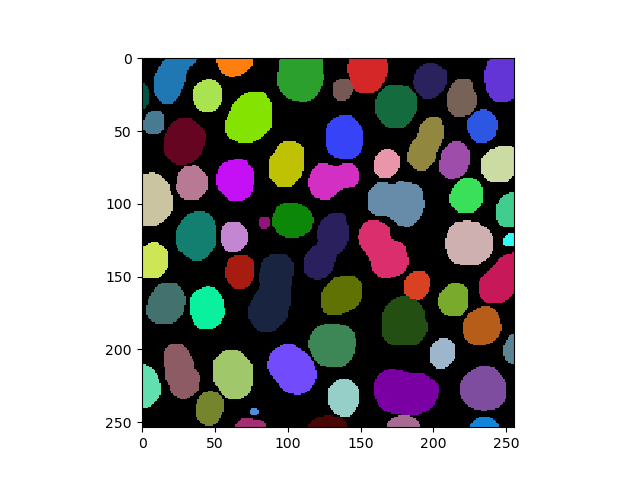

In [8]:
label_blobs = cle.asarray(imread("../../data/blobs_labeled.tif")).astype(np.uint32)
label_blobs